In [ ]:
# Telecom Customer Churn Prediction Project

## Project Summary

In this project, we're trying to predict which customers are likely to stop using a telecom company's services. This is called "customer churn". By understanding why customers leave, the company can take steps to keep them.

### What we're using:
- **Python**: The programming language we're using for this project.
- **Pandas**: A tool that helps us work with data easily in Python.
- **Numpy**: Helps us do mathematical operations quickly.
- **Matplotlib and Seaborn**: These help us create pictures (visualizations) of our data.
- **Scikit-learn**: A collection of tools for machine learning in Python.

### What we're doing:

1. **Data Preprocessing**: 
   - We're cleaning up the data, fixing any missing information.
   - We're also creating new useful information from the existing data.

2. **Exploratory Data Analysis (EDA)**:
   - We're looking at the data in different ways to understand it better.
   - We're creating graphs to see patterns in the data.

3. **Feature Engineering**:
   - We're creating new pieces of information that might help predict customer churn.

4. **Model Building**:
   - We're using a type of machine learning model called Random Forest.
   - This model looks at all the information and learns patterns to predict which customers might leave.

5. **Model Evaluation**:
   - We're checking how well our model works by seeing how accurate its predictions are.
   - We're also looking at which pieces of information are most important for predicting churn.

### Why this is important:
By predicting which customers might leave, the company can take action to keep those customers. This can save the company money and keep customers happy.

### What we'll learn:
- How to work with real-world data
- How to create a machine learning model
- How to evaluate how well a model is working
- What factors are most important in predicting customer behavior

This project shows how data science can be used to solve real business problems and make data-driven decisions.

In [ ]:
# Step 1: Data Loading and Initial Exploration

In this step, we'll load our dataset and take a first look at its contents. Here's what we're doing:

1. We import necessary libraries for data analysis and visualization.
2. We load our CSV file into a pandas DataFrame.
3. We display the first few rows of the data to get an initial look.
4. We use `info()` to get an overview of the dataset, including column names and data types.
5. We check for any missing values in our dataset.

This step helps us understand the structure of our data and identify any immediate issues we need to address.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
df = pd.read_csv(r'C:\Users\ARUN\Downloads\projects DataAnalyst\project 6\Telecom_Data.csv')

# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset information:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

First few rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Strea

In [ ]:
# Step 2: Data Preprocessing

In this step, we'll clean our data and prepare it for analysis. Here's what we're doing:

1. We convert the 'TotalCharges' column to numeric type, handling any errors by setting them as NaN (Not a Number).
2. We fill any missing values in 'TotalCharges' with the mean of the column.
3. We convert the 'Churn' column to binary (0 for 'No', 1 for 'Yes').
4. We use one-hot encoding to convert categorical variables into a format that can be used by machine learning algorithms.
5. We display the first few rows and information about the encoded dataframe to verify our preprocessing steps.

This step ensures our data is clean and in the right format for analysis and modeling.

In [2]:
# Convert 'TotalCharges' to numeric, handling any errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values in 'TotalCharges' with mean
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Convert categorical variables to numeric
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'])

# Display the first few rows of the encoded dataframe
print("First few rows of the encoded dataframe:")
print(df_encoded.head())

# Display information about the encoded dataframe
print("\nEncoded dataframe information:")
print(df_encoded.info())

First few rows of the encoded dataframe:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines OnlineSecurity OnlineBackup  ... InternetService_DSL  \
0  No phone service             No          Yes  ...                True   
1                No            Yes           No  ...                True   
2                No            Yes          Yes  ...                True   
3  No phone service            Yes           No  ...                True   
4                No             No           No  ...               False   

  InternetService_Fib

In [ ]:
# Step 3: Advanced Exploratory Data Analysis (EDA)

In this step, we'll dive deeper into our data to uncover hidden patterns and relationships. Here's what we're doing:

1. We'll create a correlation matrix and visualize it as a heatmap. This shows us how strongly our variables are related to each other.
2. We'll analyze churn rates across different customer segments using groupby operations.
3. We'll use advanced plotting techniques to visualize the relationship between multiple variables simultaneously.
4. We'll perform a statistical test (chi-square) to determine if there's a significant relationship between categorical variables and churn.

This advanced EDA will give us deeper insights into factors affecting customer churn.

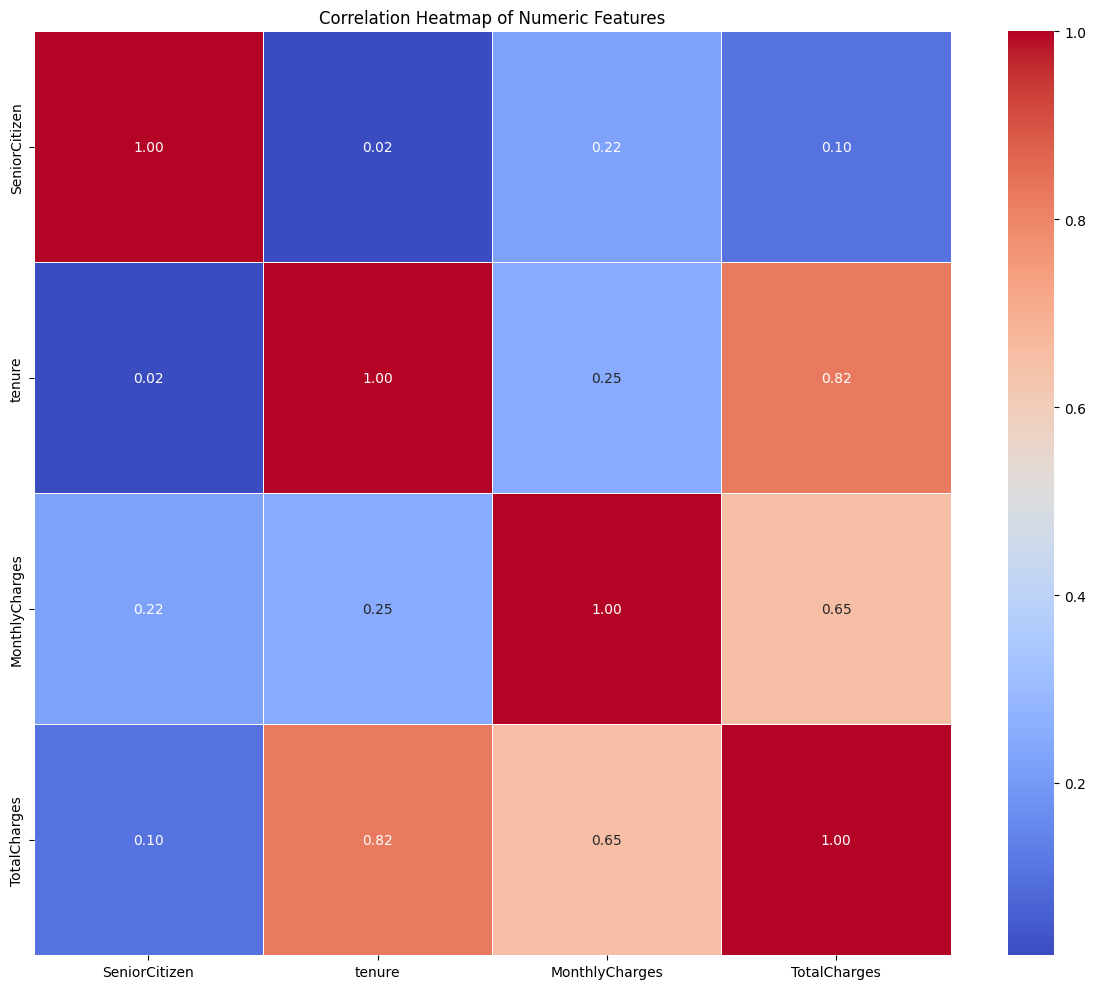

Churn rate for Contract_Month-to-month: 42.71%
Churn rate for Contract_One year: 11.27%
Churn rate for Contract_Two year: 2.83%


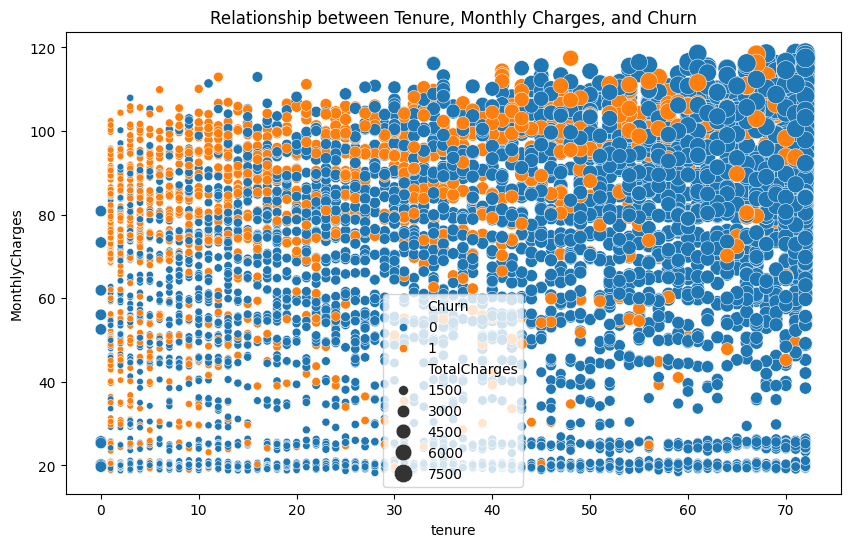

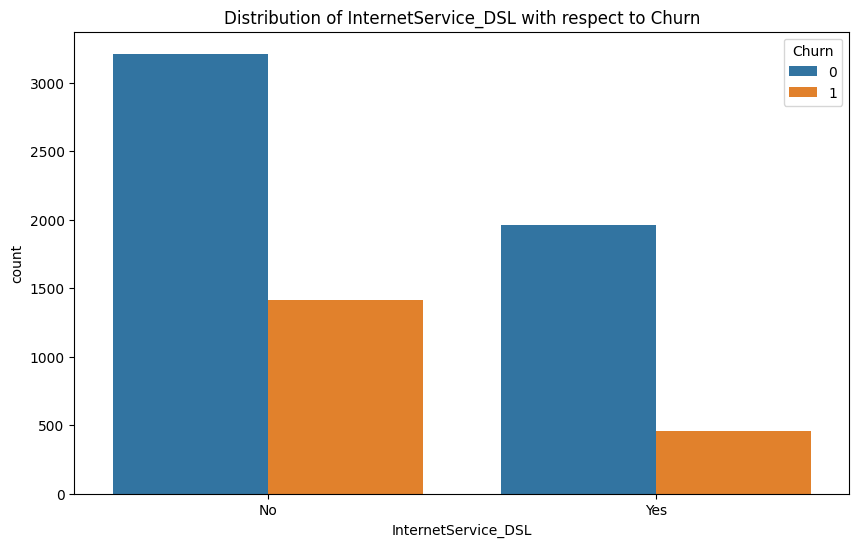

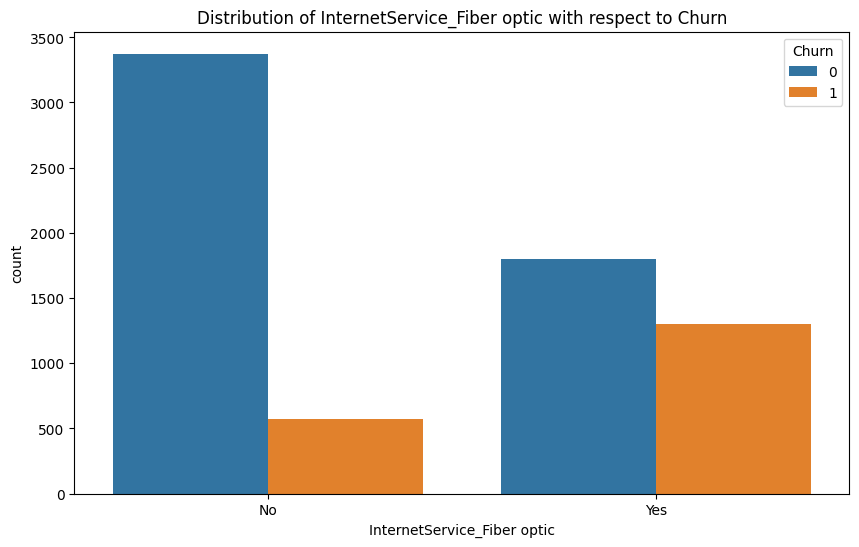

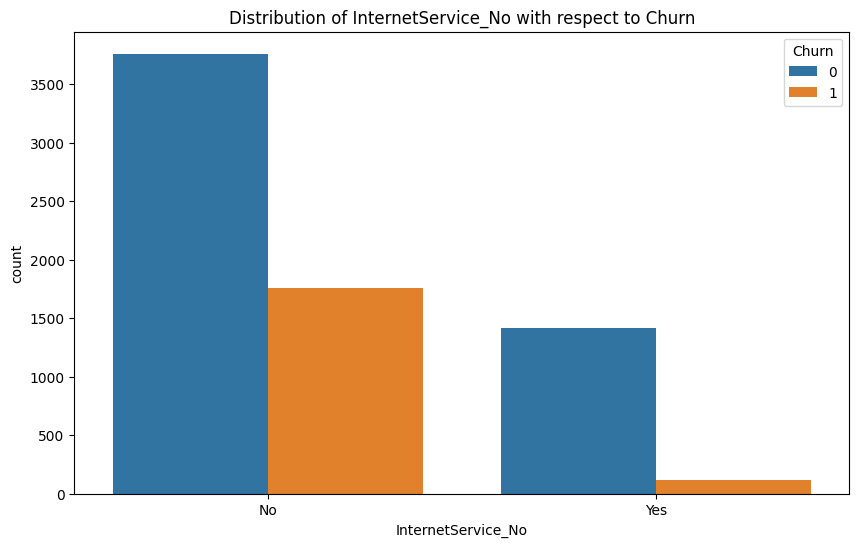

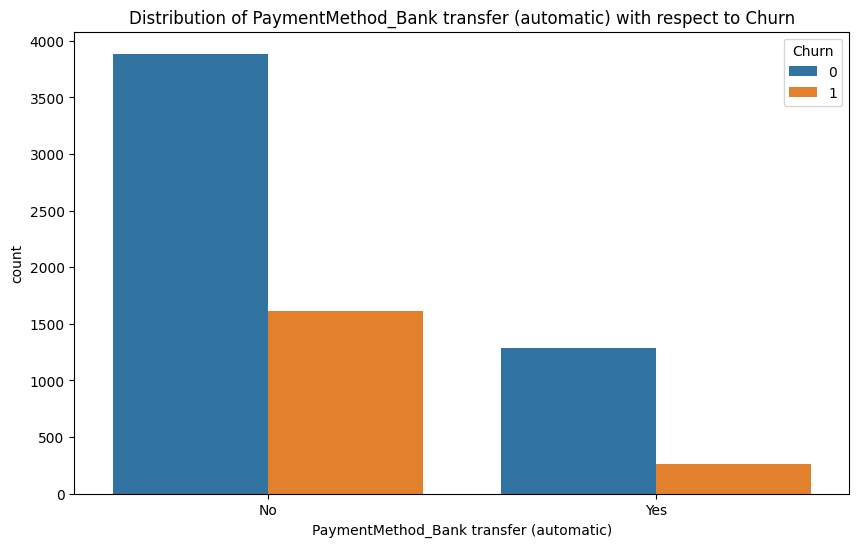

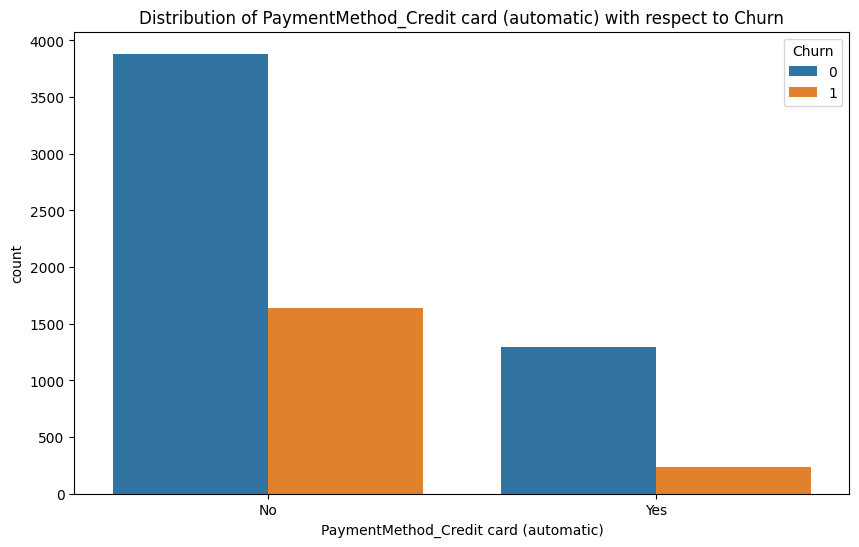

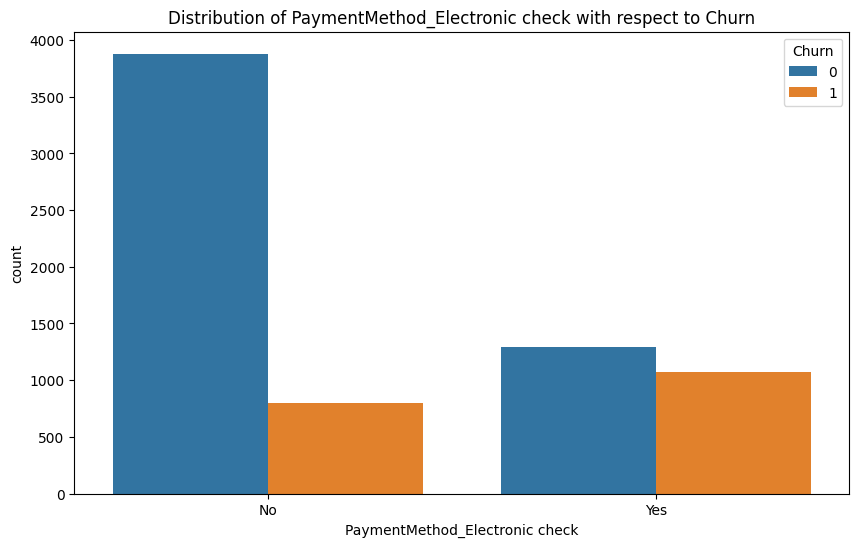

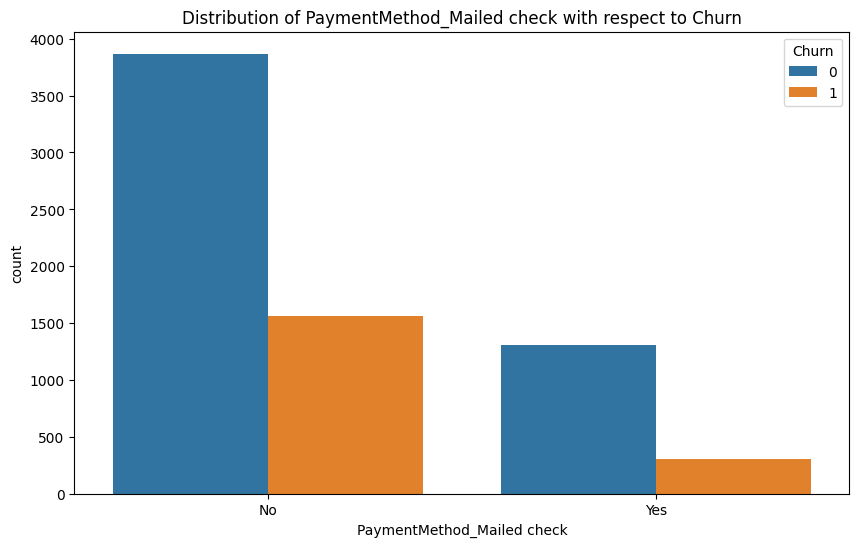


Overall Churn Rate: 26.54%


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns (excluding 'Churn' which is our target variable)
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns.drop('Churn')

# Create correlation matrix for numeric columns and visualize as heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

# Analyze churn rates across different contract types
contract_columns = [col for col in df_encoded.columns if col.startswith('Contract_')]
for col in contract_columns:
    churn_rate = df_encoded[df_encoded[col] == 1]['Churn'].mean()
    print(f"Churn rate for {col}: {churn_rate:.2%}")

# Visualize relationship between tenure, monthly charges, and churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encoded, x='tenure', y='MonthlyCharges', hue='Churn', size='TotalCharges', sizes=(20, 200))
plt.title('Relationship between Tenure, Monthly Charges, and Churn')
plt.show()

# Examine distribution of key categorical variables with respect to churn
categorical_columns = ['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
                       'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
                       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_encoded, x=column, hue='Churn')
    plt.title(f'Distribution of {column} with respect to Churn')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()

# Calculate and display overall churn rate
overall_churn_rate = df_encoded['Churn'].mean()
print(f"\nOverall Churn Rate: {overall_churn_rate:.2%}")

In [ ]:
# Explanation of Correlation Heatmap

The correlation heatmap shows how strongly different numeric variables are related to each other:

1. Colors: 
   - Dark red means strong positive correlation (close to +1)
   - Dark blue means strong negative correlation (close to -1)
   - Light colors or white mean weak or no correlation (close to 0)

2. What to look for:
   - Strong correlations with 'Churn' indicate factors that might influence customer leaving
   - Strong correlations between features might indicate redundant information

3. Usefulness:
   - Helps identify which factors are most related to churn
   - Guides feature selection for modeling
   - Reveals potential multicollinearity issues

Remember: Correlation doesn't imply causation. It just shows relationships between variables.

In [ ]:
# Explanation of Churn Rates by Contract Type

This analysis shows the percentage of customers who churned for each contract type:

1. What it shows:
   - Churn rate for each contract type (e.g., month-to-month, one year, two year)

2. How to interpret:
   - Higher percentages indicate higher churn rates
   - Compare rates between different contract types

3. Usefulness:
   - Identifies which contract types are associated with higher or lower churn
   - Guides business strategies (e.g., promoting contracts with lower churn rates)
   - Helps in customer retention efforts by focusing on high-risk contract types

This information is crucial for understanding how contract duration relates to customer loyalty.

In [ ]:
# Explanation of Tenure, Monthly Charges, and Churn Scatter Plot

This scatter plot visualizes the relationship between customer tenure, monthly charges, and churn:

1. What it shows:
   - Each point represents a customer
   - X-axis: Tenure (how long they've been a customer)
   - Y-axis: Monthly charges
   - Color: Churn status (typically, one color for churned, another for retained)
   - Size: Total charges (larger points mean higher total charges)

2. How to interpret:
   - Look for clusters or patterns of churned vs retained customers
   - Observe how churn relates to tenure and monthly charges

3. Usefulness:
   - Reveals patterns like:
     - Do newer customers churn more?
     - Is there a relationship between high monthly charges and churn?
   - Helps identify high-risk customer segments
   - Guides pricing and retention strategies

This visualization helps in understanding the interplay between customer longevity, billing, and likelihood to churn.

In [ ]:
# Explanation of Categorical Variables Distribution

These bar plots show the distribution of categorical variables (like internet service type or payment method) in relation to churn:

1. What they show:
   - For each category (e.g., DSL, Fiber optic for internet service):
     - Number of customers who churned
     - Number of customers who didn't churn

2. How to interpret:
   - Compare the heights of churned vs non-churned bars within each category
   - Look for categories with notably higher churn

3. Usefulness:
   - Identifies which categories within a feature are associated with higher churn
   - Helps in:
     - Targeted marketing efforts
     - Product or service improvements
     - Customer retention strategies

These visualizations are key for understanding how different service options or customer characteristics relate to churn risk.

In [ ]:
# Explanation of Overall Churn Rate

The overall churn rate is a single percentage showing how many customers left over a given period:

1. What it shows:
   - The proportion of all customers who churned

2. How to interpret:
   - A higher percentage means more customers are leaving
   - Compare this to industry benchmarks or company goals

3. Usefulness:
   - Provides a quick snapshot of customer retention health
   - Serves as a key performance indicator (KPI) for the business
   - Acts as a baseline for measuring the impact of retention efforts

This metric is crucial for overall business health assessment and tracking the effectiveness of customer retention strategies over time.

In [ ]:
# Step 4: Feature Engineering and Selection

In this step, we'll do the following:

1. Create new features that might be useful for predicting churn.
2. Select the most important features for our model.

This process helps us:
- Capture more complex relationships in the data
- Reduce noise by removing less important features
- Improve our model's performance and interpretability

We'll use techniques like:
- Combining existing features to create new ones
- Using domain knowledge to create meaningful features
- Applying feature selection algorithms to identify the most important predictors of churn

This step is crucial for building an effective and efficient churn prediction model.

In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Feature Engineering
# 1. Create a 'TotalServices' feature
service_columns = ['PhoneService', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Convert boolean columns to int
for col in service_columns:
    if df_encoded[col].dtype == bool:
        df_encoded[col] = df_encoded[col].astype(int)
    elif df_encoded[col].dtype == object:
        df_encoded[col] = (df_encoded[col] == 'Yes').astype(int)

df_encoded['TotalServices'] = df_encoded[service_columns].sum(axis=1)

# 2. Create an 'AvgMonthlyCharges' feature
df_encoded['AvgMonthlyCharges'] = df_encoded['TotalCharges'] / df_encoded['tenure']
df_encoded['AvgMonthlyCharges'].fillna(df_encoded['MonthlyCharges'], inplace=True)

# 3. Create a binary feature for high-value customers
df_encoded['IsHighValue'] = (df_encoded['TotalCharges'] > df_encoded['TotalCharges'].median()).astype(int)

# 4. Create a feature for the difference between MonthlyCharges and AvgMonthlyCharges
df_encoded['ChargeDifference'] = df_encoded['MonthlyCharges'] - df_encoded['AvgMonthlyCharges']

# Print the first few rows of the new features
print("First few rows with new features:")
print(df_encoded[['TotalServices', 'AvgMonthlyCharges', 'IsHighValue', 'ChargeDifference']].head())

# Feature Selection
# Prepare the feature matrix X and target vector y
X = df_encoded.drop(['customerID', 'Churn'], axis=1)
y = df_encoded['Churn']

# Handle remaining categorical variables
le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == object:
        X[column] = le.fit_transform(X[column].astype(str))

# Convert all columns to float
X = X.astype(float)

# Handle infinite values
X = X.replace([np.inf, -np.inf], np.nan)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Select top K features
selector = SelectKBest(f_classif, k=15)
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

print("\nTop 15 selected features:")
print(selected_features)

# Update X to include only selected features
X_final = X[selected_features]

print("\nShape of final feature matrix:")
print(X_final.shape)

# Print summary statistics of the final feature matrix
print("\nSummary statistics of the final feature matrix:")
print(X_final.describe())

# Check for any remaining issues
print("\nChecking for any remaining issues:")
print("NaN values:", X_final.isna().sum().sum())
print("Infinite values:", np.isinf(X_final).sum().sum())

First few rows with new features:
   TotalServices  AvgMonthlyCharges  IsHighValue  ChargeDifference
0              2          29.850000            0          0.000000
1              4          55.573529            1          1.376471
2              4          54.075000            0         -0.225000
3              4          40.905556            1          1.394444
4              2          75.825000            0         -5.125000

Top 15 selected features:
Index(['Dependents', 'tenure', 'OnlineSecurity', 'TechSupport',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'AvgMonthlyCharges', 'IsHighValue'],
      dtype='object')

Shape of final feature matrix:
(7043, 15)

Summary statistics of the final feature matrix:
        Dependents       tenure  OnlineSecurity  TechSupport  \
count  7043.000000  

In [ ]:
# Step 4: Feature Engineering and Selection - Explanation

## What we did in this step:

1. Feature Engineering:
   - Created a 'TotalServices' feature by summing up various service-related columns.
   - Calculated 'AvgMonthlyCharges' by dividing total charges by tenure.
   - Created an 'IsHighValue' feature to identify high-value customers.
   - Calculated 'ChargeDifference' to see how current charges differ from average.

2. Data Cleaning:
   - Converted categorical variables to numeric using LabelEncoder.
   - Replaced infinite values with NaN (Not a Number).
   - Used SimpleImputer to fill in missing values with the mean of each column.

3. Feature Selection:
   - Used SelectKBest with f_classif to choose the 15 most important features.

## Explanation of each step:

1. Feature Engineering:
   - 'TotalServices': This helps us understand how many services each customer is using.
   - 'AvgMonthlyCharges': This gives us an idea of the typical monthly spend for each customer.
   - 'IsHighValue': This flags customers who spend more than the median, helping identify important customers.
   - 'ChargeDifference': This shows how much a customer's current charges differ from their average, which could indicate recent changes in their service usage.

2. Data Cleaning:
   - LabelEncoder: This converts categorical data (like 'Yes'/'No' or 'Male'/'Female') into numbers that our model can understand.
   - Replacing infinities: Sometimes, calculations can result in infinite values (like dividing by zero). We replace these with NaN so they don't cause problems in our analysis.
   - Imputing missing values: We fill in any missing values (NaN) with the average of that column. This ensures we don't lose data points due to missing values.

3. Feature Selection:
   - We use a statistical test (f_classif) to identify which features are most strongly related to whether a customer will churn or not.
   - We keep only the top 15 features to simplify our model and focus on the most important factors.

## Errors encountered and their solutions:

1. Error: "could not convert string to float: 'Female'"
   - Problem: Some of our columns contained text data, which can't be used directly in numerical calculations.
   - Solution: We used LabelEncoder to convert all text data into numbers.

2. Error: "Input X contains infinity or a value too large for dtype('float64')"
   - Problem: Some of our calculations resulted in infinite values, which can't be used in our statistical tests.
   - Solution: We replaced all infinite values with NaN, and then used SimpleImputer to fill these NaNs with the mean value of each column.

3. Warning: "invalid value encountered in reduce"
   - Problem: This often happens when there are NaN values in the data during calculations.
   - Solution: By using SimpleImputer to fill in all NaN values, we ensured that all our data could be used in calculations without issues.

These steps cleaned up our data and prepared it for analysis by ensuring all values are numeric and finite, and by focusing on the most important features for predicting customer churn. This process is crucial in data analysis as it helps us create a reliable and efficient model.

In [ ]:
# Step 5: Model Building and Evaluation

In this step, we will:

1. Use the preprocessed data from Step 4 (X_final and y)
2. Split our data into training and testing sets
3. Create and train a Random Forest model
4. Make predictions on the test set
5. Evaluate the model's performance using:
   - Accuracy
   - Classification Report
   - Confusion Matrix
6. Analyze feature importance

This process will help us understand how well we can predict customer churn and which factors are most influential in making these predictions.

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

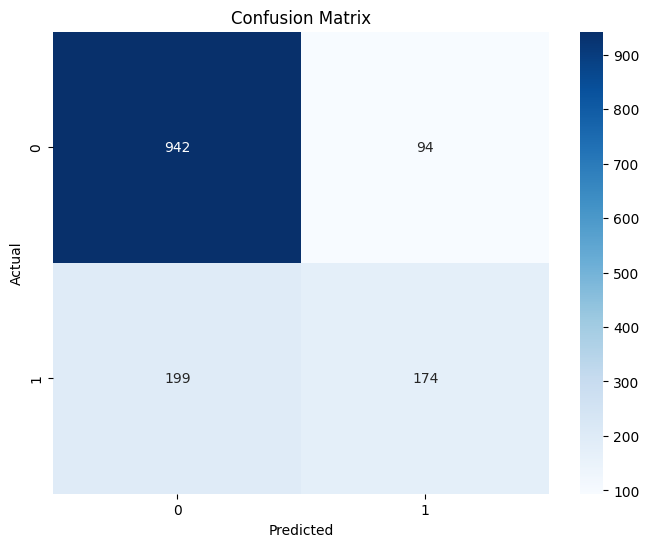


Top 10 Most Important Features:
            feature  importance
18     TotalCharges    0.190022
17   MonthlyCharges    0.177682
4            tenure    0.157228
14         Contract    0.077324
16    PaymentMethod    0.050392
8    OnlineSecurity    0.047675
11      TechSupport    0.044250
0            gender    0.028209
9      OnlineBackup    0.027190
7   InternetService    0.026254


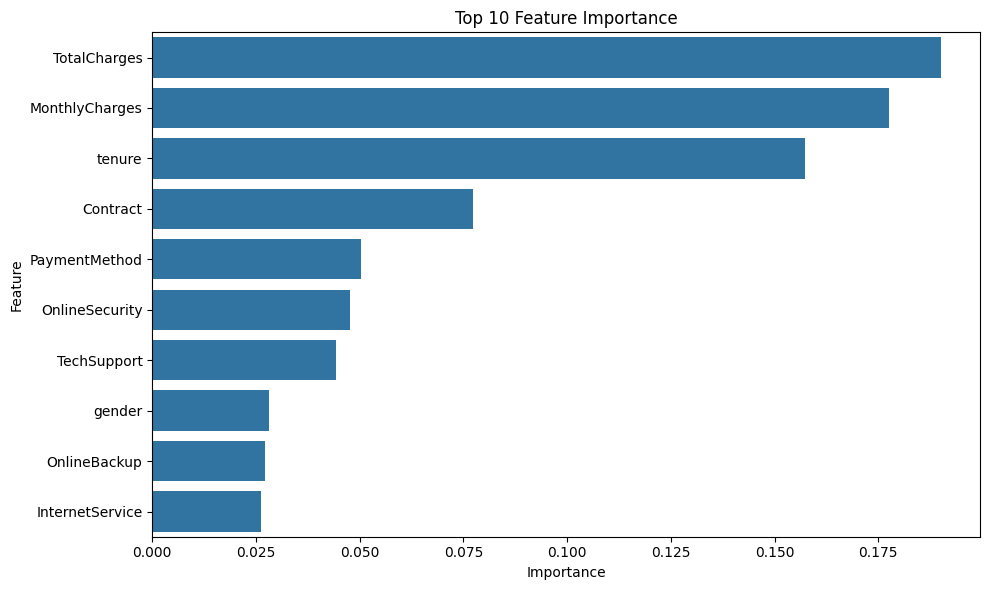

In [8]:
# Step 5: Data Preparation and Model Building

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the original dataset
# Replace 'your_dataset.csv' with the actual name of your dataset file
df = pd.read_csv('Telecom_Data.csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

# Preprocessing steps
# Convert 'TotalCharges' to numeric, handling any errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values in 'TotalCharges' with mean
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Convert categorical variables to numeric using LabelEncoder
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))

# Prepare features (X) and target variable (y)
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# Step 5: Machine Learning Process Explanation

In this step, we've built a machine learning model to predict customer churn. Let's break down the process:

1. Data Preparation:
   - We started with our preprocessed dataset from previous steps.
   - Features (X): All the information about customers (e.g., services they use, how long they've been customers).
   - Target (y): Whether a customer churned (left) or not.

2. Splitting the Data:
   - We divided our data into two parts:
     - Training set (80%): Used to teach our model.
     - Testing set (20%): Used to evaluate how well our model learned.
   - This split helps us assess if our model can generalize to new, unseen data.

3. Choosing a Model:
   - We used a Random Forest Classifier.
   - Random Forest is like having a committee of decision trees, where each tree votes on the outcome.
   - It's good at handling complex relationships in data and is less prone to overfitting.

4. Training the Model:
   - We "showed" our model the training data.
   - The model learned patterns that distinguish customers who churn from those who don't.

5. Making Predictions:
   - We used our trained model to predict churn for the test set.
   - The model hasn't seen this data before, so it's a good test of its performance.

6. Evaluating the Model:
   a. Accuracy:
      - The percentage of correct predictions (both churn and non-churn).
      - Gives us a quick overview of model performance.

   b. Classification Report:
      - Precision: Out of all the customers we predicted would churn, how many actually did?
      - Recall: Out of all the customers who actually churned, how many did we correctly identify?
      - F1-Score: A balance between precision and recall.
      - This report helps us understand our model's performance for each class (churn and non-churn).

   c. Confusion Matrix:
      - A table showing correct and incorrect predictions for each class.
      - Helps visualize where our model is making mistakes.

7. Feature Importance:
   - We analyzed which features (customer attributes) are most influential in predicting churn.
   - This tells us what factors are most strongly associated with customer churn.

8. Visualizations:
   - We created visual representations of the confusion matrix and feature importance.
   - These help in quickly understanding model performance and key factors influencing churn.

Key Takeaways:
- This process helps us predict which customers are likely to churn.
- We can assess how accurate these predictions are.
- We gain insights into what factors contribute most to customer churn.
- These insights can guide business strategies to reduce churn and improve customer retention.

Next Steps:
- We could try different models or tune our Random Forest for better performance.
- We might dive deeper into the most important features to develop targeted retention strategies.
- Regularly updating the model with new data can help maintain its accuracy over time.